# Week 4: Non-regular languages

In [1]:
from tock import *
from tock.syntax import String
import itertools

# Tuesday

<div class="alert alert-info"><p><b>Read</b> Section 1.4, focusing on pages 77-79.</p><p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bc527839-84d7-44b2-bff1-ac06012dd091">W4E1: Prelude to the Pumping Lemma.</a></div>

## Non-regular languages

We've seen that three computational models (DFA, NFA, regular expression) turn out to recognize the same class of languages, the regular languages. Are there languages that aren't regular? Definitely -- the two classic examples are

$$ B = \{\mathtt{0}^n \mathtt{1}^n \mid n \geq 0\} $$
$$ G = \{w w^R \mid w \in \{\mathtt{0}, \mathtt{1}\}^\ast \} $$

The intuitive reason why is: If I give you two strings $u, v$, what information would you need about $u$ to decide whether $uv$ is in the language? Let's say that $L$ is the language of natural base-10 numbers that are divisible by 3. Recall that a number is divisible by 3 iff its digits sum to a multiple of 3. So the only information that you need about $u$ is the sum of its digits, _modulo 3_. That's a finite amount of information, so the language is regular.

Now consider $B$. If I give you $u=\mathtt{000001}$, the only $v$ that matches up with it is $v=\mathtt{1111}$. The information that you need about $u$ is how many $\mathtt{0}$'s it contains -- which can be unbounded. So, intuitively, this is not a regular language.

## The pumping lemma

But how do we really prove that $B$ is not regular? To do this, we entertain the possibility that it *is* regular. If there were a DFA $M$ that recognizes $B$, we try to "break" it by finding a string that is *not* in $B$ but *is* accepted by $M$. If we show that we can break *all* possible DFAs in this way, then that means we've shown that there is *no* DFA that recognizes $B$. So $B$ is not regular.

The way that we are going to find the string that breaks $M$ involves a back-and-forth that is best thought of as a dialogue. Below, we imagine a dialogue between two people named Alice and Bill. Bill proposes $M$. Alice gives Bill a "test" string $s$ that $M$ is supposed to accept. But then, she uses the information that Bill reveals to concoct another string, and this is the one that breaks $M$.

## A dialogue

Alice. The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Bill. Yes it is!

Alice. Oh really, then show me a DFA that generates it.

Bill. Here's one:

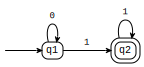

In [2]:
m = read_csv("pumping1.csv")
m

Alice. How many states does it have?

Bill. Let me see...

In [3]:
p = len(m.states)
p

2

Alice. Does your automaton accept the string $s = \texttt{0}^p \texttt{1}^p$?

In [4]:
s = String(['0']*p + ['1']*p)
s

String(values=('0', '0', '1', '1'))

Bill. Let me see...

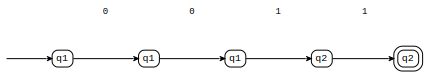

Yes.


In [5]:
graph = run(m, s)
display(graph)
path = graph.only_path()
if path.accept:
    print('Yes.')
else:
    print('No, I lose.')

Alice. Does this run use a state twice while reading in the first half of the string?

Bill. Let me see...

In [6]:
if path.accept:
    for i, j in itertools.combinations(range(p+1), 2):
        if path[i][0] == path[j][0]:
            print(f'Yes, the state is {path[i][0]}.')
            break
    else:
        print(f'No.')
else:
    print("I've lost already.")

Yes, the state is q1.


Alice. What are the strings that it reads up to the first visit, between the first and second visits, and after the second visit?

In [7]:
if path.accept:
    x = String(s[:i])
    y = String(s[i:j])
    z = String(s[j:])
    print(f'{x}, {y}, and {z}')
else:
    print("I've lost already.")
    x = y = z = []

ε, 0, and 0 1 1


Alice. So, does your automaton accept this string?

In [8]:
s2 = x + 2 * y + z
s2

String(values=('0', '0', '0', '1', '1'))

Bill. Let me see...

In [9]:
if path.accept:
    p2 = run(m, s2).only_path()
    if p2.accept:
        print('Yes, I lose.')
    else:
        print('No.')
else:
    print("I've lost already.")

Yes, I lose.


Try loading some other automata (`pumping2.csv`, `pumping3.csv`) to see how Bill always fails.

## The dialogue explained

<p class="alert alert-info"><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bc527839-84d7-44b2-bff1-ac06012dd091"></a> W4E2: The Pumping Lemma.</p>

Alice first chooses $s = \texttt{0}^p \texttt{1}^p$, which she knows belongs to $B$. Hopefully it will become clear soon why she chooses this particular string.

Alice knows that Bill's DFA $M$, which supposedly recognizes $B$, has $p$ states. And on reading the first $p$ symbols, this automaton must make $(p+1)$ visits to states: first the start state, then one for each symbol. By the [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle), two of these visits must be to the same state. So when she asks Bill whether this happens, she knows that the answer must be yes.

Now let $x$ be the part of the string read before the first visit, let $y$ be the part of the string read between the two visits, and let $z$ be the part of the string read after the second visit. Alice knows that $y$ is nonempty because $M$ is a DFA, and $|xy| \leq p$ because the repeat must occur within the first $p$ symbols. Her choice of $s$, then, guarantees that $y$ consists of one or more $\texttt{0}$'s and no $\texttt{1}$'s.

Here's what the accepting path for $s$ looks like:
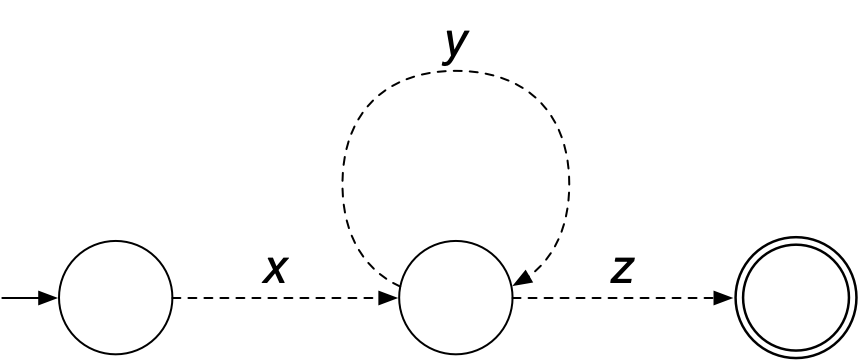
The dashed line stands for one or more transitions. By going around the loop zero times, we get an accepting path for $xz$; by going around the loop two times, we get accepting path for $xyyz$; and in general, by going around the loop $i$ times, we get an accepting path for $xy^iz$. So all of these strings must be accepted by $M$.

Alice chooses one of these strings. In this case, the choice doesn't matter too much; she chooses $i=2$. But because $y$ consists of one or more $\texttt{0}$'s and no $\texttt{1}$'s, $xyyz$ has more $\texttt{0}$'s than $\texttt{1}$'s and therefore does not belong to $B$. 

Since $M$ accepts $xyyz$ but $xyyz \not\in B$, $M$ does not recognize $B$.

## The dialogue becomes a proof

Now we distill the dialogue into a proof.

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that there is a DFA $M$ that recognizes $B$. Let $p$ be the number of states in $M$. Let $s = \texttt{0}^p \texttt{1}^p$, which belongs to $B$, so is accepted by $M$. On reading the first $p$ symbols of $s$, $M$ makes $(p+1)$ visits to states (the start state plus one for each symbol). But $M$ has only $p$ states, so by the pigeonhole principle, it must visit the same state $q$ twice while reading the first $p$ symbols. 

Let $x$ be the string read before the first visit to $q$, let $y$ be the string read between the first two visits to $q$, and let $z$ be the rest of the string. We know that $y$ must be nonempty because $M$ is a DFA, and $y$ must contain only $\texttt{0}$s, because the repeat visit to $q$ occurred within the first $p$ symbols of $s$.

So $xyyz$ has more $\texttt{0}$'s than $\texttt{1}$'s, so it does not belong to $B$. But $M$ must accept $xyyz$. This contradicts the assumption that $M$ recognizes $B$.

## The pumping lemma

If you were to write more and more of these proofs, however, you would find yourself making the same argument over and over. The pumping lemma is like a boilerplate non-regularity proof that you can use to simplify your proofs.

The lemma itself goes like this:

1. For all regular languages $A$,
2. there exists a $p \geq 1$ such that
3. for all $s \in A$ such that $|s| \geq p$,
4. there exist $x, y, z$ such that $s = xyz$, $|y| > 0$, $|xy| \leq p$ and
5. for all $i \geq 0$, $x y^i z \in A$.

And here is how you use it:

Claim: The language $B = \{\texttt{0}^n \texttt{1}^n \mid n \geq 0\}$ is not regular.

Proof: Suppose, for the sake of contradiction, that $B$ is regular. By the pumping lemma for regular languages, there is a $p \geq 1$ such that any $s \in B$ such that $|s| \geq p$ can be written as $s = xyz$, where $|y| > 0$, $|xy| \leq p$, and for all $i$, $x y^i z \in B$.

Let $s = \texttt{0}^p \texttt{1}^p$ (line 3). Then the pumping lemma writes $s$ as $xyz$, where $|y| > 0$ and $|xy| \leq p$ (line 4), which means that $y$ consists of one or more $\texttt{0}$'s. Let $i=2$. The pumping lemma says (line 5) that $xy^iz \in B$, but $xy^iz$ contains more $\texttt{0}$s than $\texttt{1}$s, which is a contradiction.

The advantage is that this proof is shorter and doesn't need to make reference to an actual automaton. If you prefer to use the longer form, it's fine with me. But, regardless, you need to understand the argument, and it's critical that you remember which variables you get to choose and which variables you don't get to choose. Your job, as Alice, is to choose $s$ (line 3) and $i$ (line 5), and to produce a contradiction, namely, that $xy^iz$ does not belong to the language. Bill chooses $p$ (line 2) and $xyz$ (line 4); since you don't get to choose them, you must write your argument to work for any values of $p$ and $xyz$.

## More practice with the pumping lemma

**Question.** Prove that $G = \{ ww^R \mid w \in \{\mathtt{0},\mathtt{1}\}^\ast\}$ is not regular.

**Question.** Prove that $C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$ is not regular.

# Thursday

<div class="alert alert-info"><p><b>Reread</b> Section 1.4, paying closer attention this time to pages 80-82.</p>
    <p><b>Watch</b> <a href="https://notredame.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7835d492-b277-4094-bbd9-ac06015a76db">W4E3: Proving Nonregularity Using Closure Properties</a></p></div>

Today we look at non-regularity proofs that use closure properties. We've learned a number of closure properties: union, concatenation, Kleene star, reversal. But the two closure properties that are especially useful are intersection and string homomorphism.

## Intersection

Example 1.74 mentions an alternative proof strategy that involves the fact that regular languages are closed under intersection (footnote 3 of this chapter). This is an extremely common technique that lets you filter out strings that you don't want to deal with.

To show: Prove that $C = \{w \in \{\mathtt{0}, \mathtt{1}\}^\ast \mid \text{$w$ contains an equal number of $\mathtt{0}$'s and $\mathtt{1}$'s}\}$ is not regular.

Proof: Suppose that $C$ is regular. Because regular languages are closed under intersection, we can form the language $C \cap \texttt{0}^\ast \texttt{1}^\ast$, which must also be regular. But this language is none other than $B$, which we know is not regular. This is a contradiction.

As another example, let's prove that C (the programming language) is not regular. This is a big, messy language. The idea is to focus on one aspect of it, like curly braces. Suppose that C is regular. Then intersect C with the regular expression
$$\texttt{void main(void)}\texttt{\{}^\ast\texttt{\}}^\ast$$
The only valid C programs that match this are of the form
$$\texttt{void main(void)}\texttt{\{}^n\texttt{\}}^n$$
for $n \geq 1$. So now our job is to show that this simpler language (call it $C'$) is not regular. This is much easier -- but the $\texttt{void main(void)}$ is a nuisance. The proof goes like this:

The pumping lemma for regular languages says that there is a $p \geq 1$ such that any $s$ where $|s| \geq p$ can be written as $s = xyz$ where $|y| > 0$, $|xy| \leq p$ and $xy^iz \in C'$ for all $i$. 
Let $$s = \texttt{void main(void)}\texttt{\{}^p\texttt{\}}^p$$
Note that because $|xy| \leq p$, $y$ cannot contain any $\texttt{\}}$ symbols.
- Case 1: $y$ consists of only $\{$ symbols. Then let $i=2$. But $xyyz$ must have more $\{$ symbols than $\}$ symbols, so it does not belong to $C'$, which is a contradiction.
- Case 2: $y$ contains something other than $\{$. Then let $i=0$. But $xz$ does not belong to $C'$ because -- because obviously, right?

You might be able to get away with that Case 2, but a much cleaner way of dealing with this is to use the next closure property.

## String homomorphisms

Another commonly used property is closure under string homomorphisms (Exercise 1.66). Remember that we defined a string homomorphism in HW1 to be a mapping from strings to strings with the properties
\begin{align*}
f(\varepsilon) &= \epsilon \\
f(uv) &= f(u) f(v).
\end{align*}
and we showed that we can think of a string homomorphism in terms of what it does to individual symbols. For example, if $\Sigma = \{\mathtt{a}, \mathtt{b}\}$ we can define a string homomorphism $f(\mathtt{a}) = \mathtt{a}, f(\mathtt{b}) = \varepsilon$. Extended to strings, what $f$ does is to delete all the $\mathtt{b}$'s from a string. 

Regular languages are closed under string homomorphisms. That is, if $L$ is a regular language and $f$ is a string homomorphism, then
$$f(L) = \{f(w) \mid w \in L\}$$
is also a regular language.

Proof: Let $\alpha$ be a regular expression that describes $L$. Extend $f$ to regular expressions as follows:
\begin{align*}
f(\emptyset) &= \emptyset \\
f(\alpha \cup \beta) &= f(\alpha) \cup f(\beta) \\
f(\alpha^\ast) &= f(\alpha)^\ast
\end{align*}
Then $f(\alpha)$ is a regular expression that describes $f(L)$.

Another proof: Let $N$ be a NFA that recognizes $L$. We construct a new NFA $N'$ as follows. For each transition $q \xrightarrow{a} r$, let $k = |f(a)|$. If $k=0$, replace this transition with $q \xrightarrow{\varepsilon} r$. Otherwise, replace it with a chain of $k$ transitions:
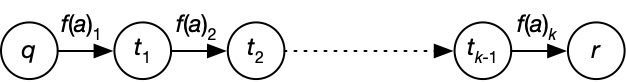
where $t_1, \ldots, t_{k-1}$ are fresh states that aren't used anywhere else. Then $N'$ recognizes $f(L)$.

This closure property lets you filter out symbols that you don't want to deal with. It also lets you conflate symbols that you don't need to distinguish. For our C-language example above, we could prove that $C'$ is not regular as follows:

Define a string homomorphism
\begin{align*}
f(\texttt{\{}) &= \texttt{0} \\
f(\texttt{\}}) &= \texttt{1} \\
f(a) &= \varepsilon \qquad a \not\in \{ \texttt{0}, \texttt{1} \}
\end{align*}

Then $f(C') = \{ \texttt{0}^n \texttt{1}^n \mid n \geq 1 \}$. But this is just $B$ (or close enough), which we know is not regular. This is a contradiction.